What is the typical range of IDM accelerations in all these simulations (when there is no shock)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# sample for one classic and one RL
rl_dir = './test_time_rollout/wu/.csv'
bcm_dir = './test_time_rollout/bcm/.csv'

sample_data_rl = pd.read_csv(rl_dir)
sample_data_bcm = pd.read_csv(bcm_dir) 

In [3]:
# get all idm vehicles acceleration data before shock time
def get_realized_accel(data, shock_time):
    # get all unique vehicle ids
    vehicle_ids = data['id'].unique()

    # get all idm vehicles, if the id has human 
    idm_vehicles = [id for id in vehicle_ids if 'human' in id]

    all_vehicle_data = []
    # get all idm vehicles acceleration data before shock time
    for veh in idm_vehicles:
        veh_data = data[data['id'] == veh]
        veh_data = veh_data[veh_data['time'] < shock_time]
        # just get realized_accel 
        veh_data = veh_data['realized_accel']
        all_vehicle_data.append(veh_data)
    return all_vehicle_data

In [ ]:
# get all idm vehicles acceleration data before shock time
def get_target_accel(data, shock_time):
    # get all unique vehicle ids
    vehicle_ids = data['id'].unique()

    # get all idm vehicles, if the id has human 
    idm_vehicles = [id for id in vehicle_ids if 'human' in id]

    all_vehicle_data = []
    # get all idm vehicles acceleration data before shock time
    for veh in idm_vehicles:
        veh_data = data[data['id'] == veh]
        veh_data = veh_data[veh_data['time'] < shock_time]
        # just get realized_accel 
        veh_data = veh_data['target_accel_with_noise_with_failsafe']
        all_vehicle_data.append(veh_data)
    return all_vehicle_data

In [4]:
shock_time = 8000

rl_data_realized = np.asarray(get_realized_accel(sample_data_rl, shock_time))
print(rl_data_realized.shape)

bcm_data_realized = np.asarray(get_realized_accel(sample_data_bcm, shock_time))
print(bcm_data_realized.shape)

rl_data_target = np.asarray(get_target_accel(sample_data_rl, shock_time))
print(rl_data_target.shape)

bcm_data_target = np.asarray(get_target_accel(sample_data_bcm, shock_time))
print(bcm_data_target.shape)


(21, 17501)
(18, 18001)


In [5]:
# plot the histogram of acceleration
def plot_hist(data):
    fig, ax = plt.subplots(figsize=(16, 5), dpi = 100)
    ax.hist(data, bins=100) #density=True, histtype='stepfilled', alpha=0.2)
    #ax.legend(loc='best', frameon=False)
    plt.show()

In [ ]:
plot_hist(rl_data_realized[0])
plot_hist(bcm_data_realized[0])

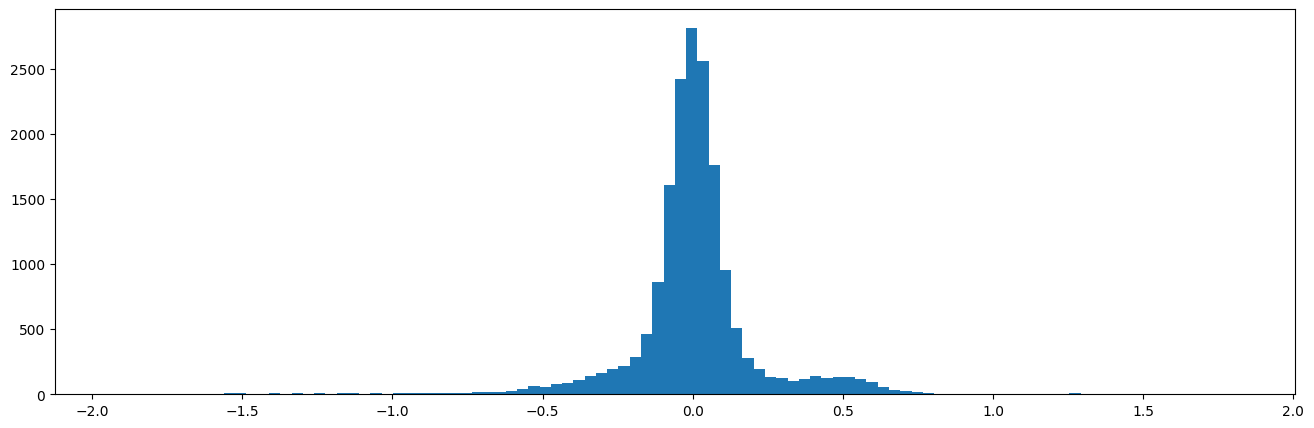

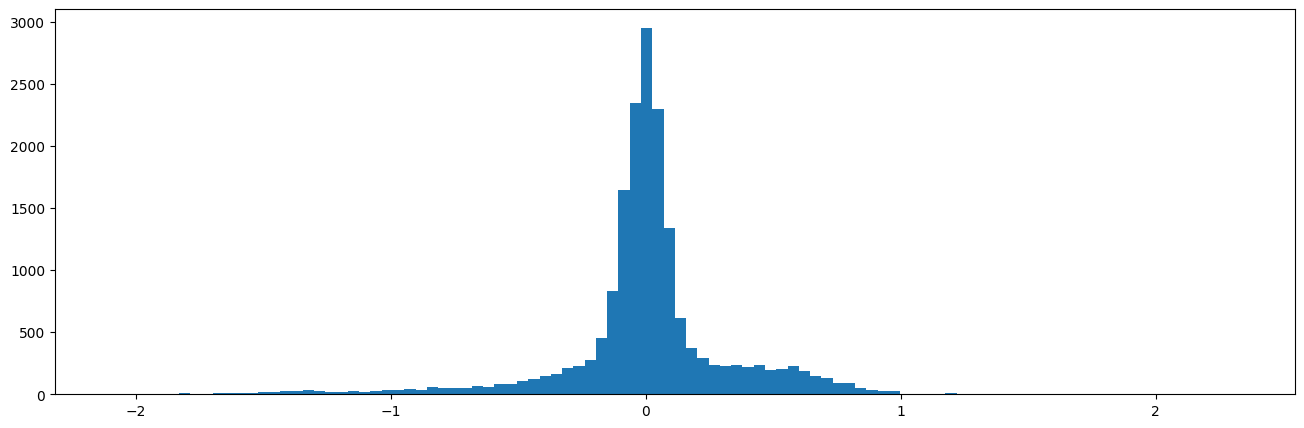

In [6]:
plot_hist(rl_data_target[0])
plot_hist(bcm_data_target[0])

In [10]:
# # To generate the IDM data
# need at various densities. 
# length 310, 400, 200 

!python classic.py --method idm --render --length 200 --gen_emission --num_rollouts 5 --horizon 5500 --warmup 0

length:  200
Frequency: 14
Intensity: -2.5509793612362985
Duration: 1.0
Intensity: -2.334458891262912
Duration: 1.4
Intensity: -2.787524691268717
Duration: 1.4
Intensity: -2.105629530987588
Duration: 1.4
Intensity: -1.3476254361730853
Duration: 1.6
Intensity: -2.3129340210065017
Duration: 2.0
Intensity: -1.1783954972455954
Duration: 1.1
Intensity: -2.5070633274742535
Duration: 1.6
Intensity: -2.4774896151086683
Duration: 2.1
Intensity: -2.648674742440332
Duration: 1.9
Intensity: -2.450834075039203
Duration: 2.4
Intensity: -1.9488982427257067
Duration: 2.0
Intensity: -1.1422387000467853
Duration: 0.9
Intensity: -1.1137550535657872
Duration: 0.2
Durations:  [10. 14. 14. 14. 16. 20. 11. 16. 21. 19. 24. 20.  9.  2.]
Start times:  [ 8000  8230  8461  8691  8922  9153  9383  9614  9844 10075 10306 10536
 10767 10998]
End times:  [8010.0, 8244.0, 8475.0, 8705.0, 8938.0, 9173.0, 9394.0, 9630.0, 9865.0, 10094.0, 10330.0, 10556.0, 10776.0, 11000.0]
Shock times: 
 [[ 8000.  8010.]
 [ 8230.  8244.